Copyright (c) 2023, Troy Phat Tran (Mr. Troy).

Question:

Multiclass image classification<br>
Dataset: Mr Troy Fruits.<br>
Direct link: http://dl.dropboxusercontent.com/s/a32yc71tgfvfvku/mr-troy-fruits.zip (~11 Megabytes)<br>
Back-up direct link: https://trientran.github.io/tf-practice-exams/mr-troy-fruits.zip<br>
This dataset comprises 3 classes (Banana, Orange, and Apple), and it is not split into training and test sets yet.<br>
Create a classifier for the given dataset. The required input shape must be 40x40x3 (RGB images).

Your task is to fill in the missing parts of the code block (where commented as "ADD CODE HERE").

In [12]:
import os
import zipfile
from urllib.request import urlretrieve


In [13]:
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.saving import load_model
import tensorflow as tf
from matplotlib import pyplot as plt

In [18]:
def multiclass_model():
    # Define a data folder to extract our compressed dataset to
    data_folder = "mr-troy-fruits/"

    # Download and extract the dataset if not existing
    if not os.path.exists(data_folder):
        dataset_url = 'http://dl.dropboxusercontent.com/s/a32yc71tgfvfvku/mr-troy-fruits.zip'
        local_zip = 'mr-troy-fruits.zip'
        urlretrieve(url=dataset_url, filename=local_zip)
        zip_ref = zipfile.ZipFile(file=local_zip, mode='r')
        zip_ref.extractall()
        zip_ref.close()

    # Define image data generator with data augmentation
    training_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    # Constants for image size and batch size
    img_size = (40, 40)  # ADD CODE HERE: just update the image size here to match the requirement
    batch_size = 32

    # Training set
    train_generator = training_datagen.flow_from_directory(
        directory=data_folder,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    # Validation set
    validation_generator = training_datagen.flow_from_directory(
        directory=data_folder,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    # Define model architecture
    model = Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1],3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

    # Define an early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, verbose=1, min_delta=0.01)

    # Show the model architecture (optional)
    summarize_model(model)

    # Start training
    history = model.fit(train_generator, validation_data=validation_generator, epochs=30, callbacks=[early_stopping])
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label="Validation loss")
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return model

===============DO NOT EDIT THIS PART================================

In [19]:
def summarize_model(model):
    model.summary()
    input_shape = model.layers[0].input_shape
    print(f'Input shape: {input_shape}')

Found 759 images belonging to 3 classes.
Found 188 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                      

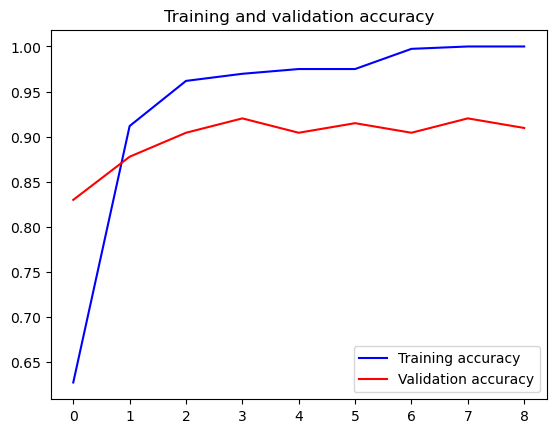

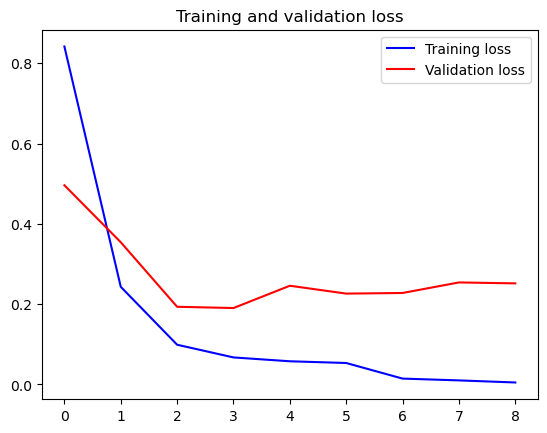

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 19, 19, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 4096)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
if __name__ == '__main__':
    # Run and save your model
    my_model = multiclass_model()
    filepath = "multiclass_rgb_model.h5"
    my_model.save(filepath)

    # Reload the saved model
    saved_model = load_model(filepath)
    summarize_model(saved_model)